# Plot cross spectra and coefficient matrix
The python notebook for making the plot of simulated PFS x HSC cross spectra and the coefficient matrix,
shown in the Figure 9 and 10 of Makiya et al. (2020), https://arxiv.org/abs/2008.13195  

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import numpy as np
import sys, os
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import matplotlib.font_manager as font_manager
del font_manager.weight_dict['roman']
font_manager._rebuild()

In [ ]:
# plot settings
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams["xtick.major.width"] = 1.0
plt.rcParams["ytick.major.width"] = 1.0
plt.rcParams["xtick.minor.width"] = 1.0
plt.rcParams["ytick.minor.width"] = 1.0
plt.rcParams["xtick.major.size"] = 8
plt.rcParams["ytick.major.size"] = 8
plt.rcParams["xtick.minor.size"] = 5
plt.rcParams["ytick.minor.size"] = 5
plt.rcParams["font.size"] = 12
plt.rcParams["axes.linewidth"] = 1.   

# Cross-spectra

In [2]:
nz = 7
nlbin = 13
z_arr = ['0.70','0.90','1.10','1.30','1.50','1.80','2.20']

In [3]:
'''
Read simulations
'''
ell = np.zeros((nz,nlbin))
clgk_sim = np.zeros((nz,nlbin))
err = np.zeros((nz,nlbin))
for iz in range(nz):
    # the read the mean cross power spectra of 30 realizations
    ifname = './cl_gk_sim/cl_gk_z'+z_arr[iz]+'_rlz0.txt'
    ell[iz,:] = np.loadtxt(ifname)[:,0]
    clgk_sim[iz,:] = np.loadtxt(ifname)[:,1]
    # read covariance
    ifname = './cov/cov_z'+z_arr[iz]+'.txt'
    cov = np.loadtxt(ifname)
    err_all = np.diag(cov)**0.5
    err[iz,:] = err_all[34:]

In [4]:
'''
Read model Cls
'''
clgk_model = np.zeros((nz,nlbin))
for iz in range(nz):
    ifname = './cl_gk_model/cl_gk_z'+z_arr[iz]+'.txt'
    clgk_model[iz,:] = np.loadtxt(ifname)[:,1]

Text(0.04, 0.5, '$l^2 \\mathcal{C}_{\\ell}$')

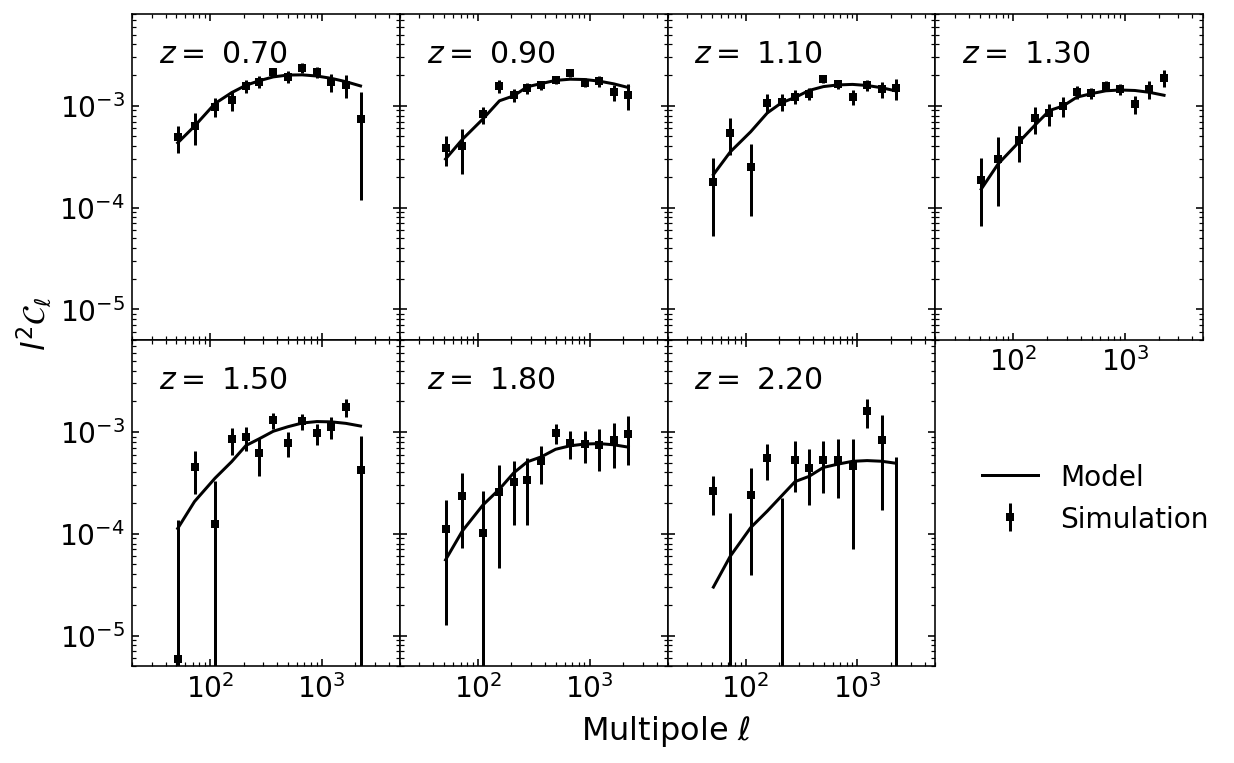

In [5]:
'''
Plot
'''
ax = [0.0 for i in range(nz)]
fig = plt.figure(figsize=(8*1.2,5*1.2))
for i in range(nz):
    if 0 < i:
        ax[i] = fig.add_subplot(2,4,i+1,sharey=ax[0])
    else:
        ax[i] = fig.add_subplot(2,4,i+1)
    # set axis params
    ax[i].xaxis.set_ticks_position('both')
    ax[i].yaxis.set_ticks_position('both')
    ax[i].get_xaxis().set_tick_params(which='both',direction='in')
    ax[i].get_yaxis().set_tick_params(which='both',direction='in')
    for tick in ax[i].xaxis.get_major_ticks():
        tick.label1.set_fontsize(14)
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label1.set_fontsize(14)
    if i in (0,1,2,3):
        ax[i].tick_params(labelbottom='off')        
    if i in (1,2,3,5,6,7):
        ax[i].tick_params(labelleft=None)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlim([20,5e3])
    ax[i].set_ylim([5e-6,8e-3])
    ax[i].text(0.1, 0.85, r"$z = $ "+str(z_arr[i]), fontsize=15, transform=ax[i].transAxes)
    
    # plot
    ax[i].errorbar(ell[i,:],clgk_sim[i,:],yerr=err[i,:],fmt='ks',ms=3.0,label='Simulation')
    ax[i].plot(ell[i,:],clgk_model[i,:],'k-',label='Model')
    if i == 6:
        ax[i].legend(bbox_to_anchor=(1.08,0.7),frameon=False,fontsize=14)
    
fig.subplots_adjust(wspace=0,hspace=0)
plt.figtext(0.45,0.04,r"${\rm Multipole}$ $\ell$",fontdict={'fontsize':16})
plt.figtext(0.04,0.5,r"$l^2 \mathcal{C}_{\ell}$",fontdict={'fontsize':16},rotation=90)
# plt.savefig(FIGDIR+'/pfs_cls.pdf')

# Correlation coefficient matrix

In [3]:
z_arr = ['0.70','0.90','1.10','1.30','1.50','1.80','2.20']

In [4]:
'''
Calculate coefficient matrix
'''
iz = 3 # z = 1.30
nbin_all = 17+17+13

# read covariance
ifname = './cov/cov_z'+z_arr[iz]+'.txt'
cov = np.loadtxt(ifname)

# calc coeff matrix
coeff = np.zeros((nbin_all,nbin_all))
for i1 in range(nbin_all):
    for i2 in range(nbin_all):
        coeff[i1,i2] = cov[i1,i2]/np.sqrt(cov[i1,i1]*cov[i2,i2])

# mask upper left half
coeff[17:,:17] = False
for i1 in range(nbin_all):
    for i2 in range(nbin_all):
        if i2 < 17 and i1 > 16:
            coeff[i1,i2] = None
        if i2 < 34 and i1 > 33:
            coeff[i1,i2] = None
            
# read ell array for plot
ifname = './cl_gk_model/cl_gk_z'+z_arr[iz]+'.txt'
ell = np.loadtxt(ifname)[:,0]
karr = [0.04+0.01*i for i in range(16)]

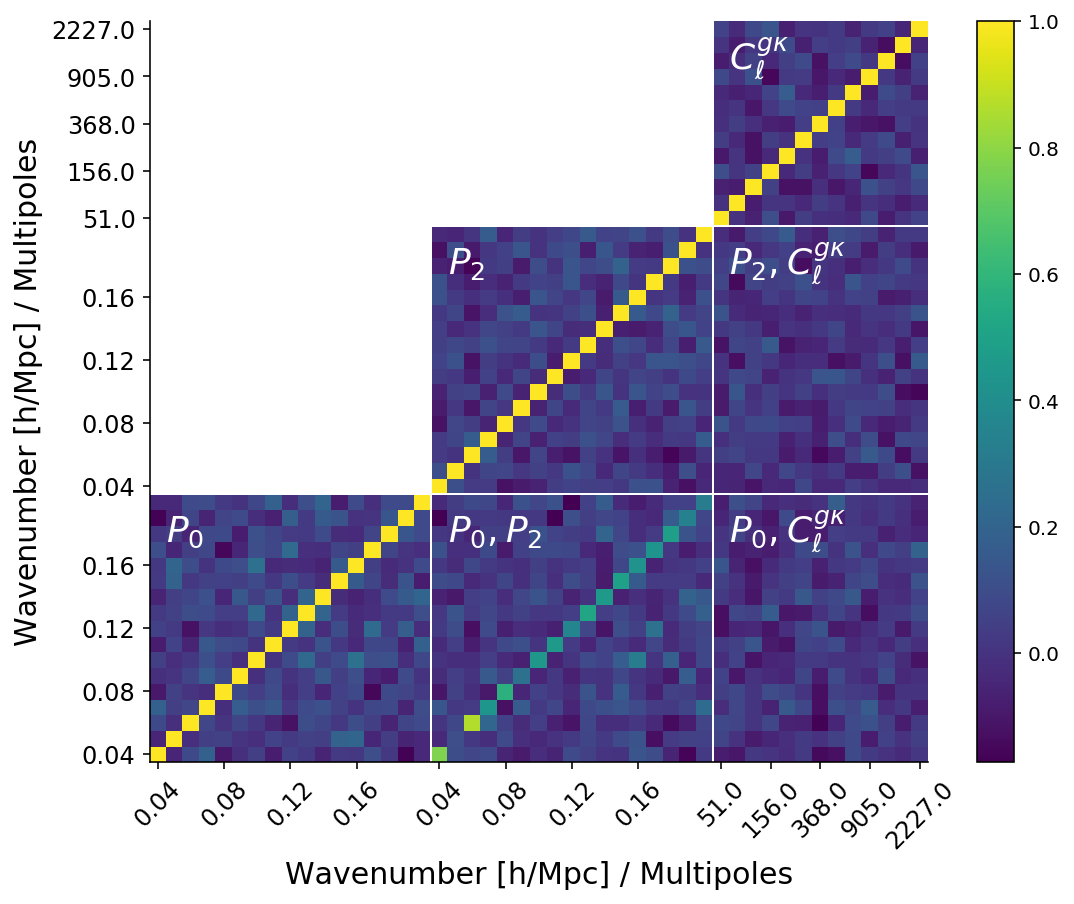

In [5]:
fig,ax = plt.subplots(figsize=(8,6.4))

# plot coefficient matrix
pc = ax.pcolor(coeff)

# colorbar
cb = fig.colorbar(pc,shrink=1.0)

# plot border lines of P0, p2 and Cl^gk
plt.plot([0,nbin_all],[17,17],'w-',lw=1)
plt.plot([0,nbin_all],[17*2,17*2],'w-',lw=1)
plt.plot([17,17],[0,nbin_all],'w-',lw=1)
plt.plot([17*2,17*2],[0,nbin_all],'w-',lw=1)

# set ticks and labels
nskip = 4
nskip2 = 3
ticks = (np.arange(16)+0.5)[::nskip]
ticks_cl = (np.arange(13)+0.5)[::nskip2]
labels = np.array(karr)[::nskip]
labels_cl = np.array([int(ell[i]) for i in range(13)])[::nskip2]
ticks = np.concatenate([ticks,ticks+17,34+ticks_cl])
labels = np.concatenate([labels,labels,labels_cl])
ax.set_xticks(ticks)
ax.set_xticklabels(labels,fontsize=12,rotation=45)
ax.set_yticks(ticks)
ax.set_yticklabels(labels,fontsize=12)
ax.text(1, 14, r'$P_{0}$',fontsize=18, color='white')
ax.text(18, 31, r'$P_{2}$',fontsize=18, color='white')
ax.text(35, 44, r'$C_{\ell}^{g\kappa}$',fontsize=18, color='white')
ax.text(18, 14, r'$P_{0}, P_{2}$',fontsize=18, color='white')
ax.text(35, 14, r'$P_{0}, C_{\ell}^{g\kappa}$',fontsize=18, color='white')
ax.text(35, 31, r'$P_{2}, C_{\ell}^{g\kappa}$',fontsize=18, color='white')
ax.set_xlabel(r'Wavenumber [h/Mpc] / Multipoles', fontsize=15)
ax.set_ylabel(r'Wavenumber [h/Mpc] / Multipoles', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
# plt.savefig(FIGDIR+'/coeff_z1p3.pdf')
plt.show()